In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [10]:
df = pd.read_csv("PIPLS_de-identification_Table.csv",encoding = "utf-8")

In [11]:
ref = pd.DataFrame()
name = list()
id_ = list()

for i in range(len(df)):
    if df["Name"][i] not in name:
        name.append(df["Name"][i])
    if df["ID"][i] not in id_:
        id_.append(df["ID"][i])

In [12]:
name_label = list()
id_label = list()
j = 1000

for i in range(len(name)):
    name_label.append("A" + str(j))
    id_label.append("B" + str(j))
    j+= 1
print(name_label)
print(id_label)

['A1000', 'A1001', 'A1002', 'A1003', 'A1004', 'A1005', 'A1006', 'A1007', 'A1008', 'A1009', 'A1010', 'A1011', 'A1012', 'A1013', 'A1014', 'A1015', 'A1016', 'A1017', 'A1018', 'A1019', 'A1020', 'A1021', 'A1022', 'A1023', 'A1024', 'A1025', 'A1026', 'A1027', 'A1028', 'A1029', 'A1030', 'A1031', 'A1032', 'A1033', 'A1034', 'A1035', 'A1036', 'A1037', 'A1038', 'A1039', 'A1040', 'A1041', 'A1042', 'A1043', 'A1044', 'A1045', 'A1046', 'A1047', 'A1048', 'A1049', 'A1050', 'A1051', 'A1052', 'A1053', 'A1054', 'A1055', 'A1056', 'A1057', 'A1058', 'A1059', 'A1060', 'A1061', 'A1062', 'A1063', 'A1064', 'A1065', 'A1066', 'A1067', 'A1068', 'A1069', 'A1070', 'A1071', 'A1072', 'A1073', 'A1074', 'A1075', 'A1076', 'A1077', 'A1078', 'A1079', 'A1080', 'A1081', 'A1082', 'A1083', 'A1084', 'A1085', 'A1086', 'A1087']
['B1000', 'B1001', 'B1002', 'B1003', 'B1004', 'B1005', 'B1006', 'B1007', 'B1008', 'B1009', 'B1010', 'B1011', 'B1012', 'B1013', 'B1014', 'B1015', 'B1016', 'B1017', 'B1018', 'B1019', 'B1020', 'B1021', 'B1022',

In [24]:
ref = pd.DataFrame({"name":name, "id":id_, "name_label":name_label, "id_label":id_label})

In [25]:
for i in range(len(df)):
    for j in range(len(ref)):
        if df["Name"][i] == ref['name'][j]:
            df["Name"][i] = ref['name_label'][j]
        if df["ID"][i] == ref['id'][j]:
            df["ID"][i] = ref['id_label'][j]

C:\Users\User\AppData\Local\Temp\ipykernel_10880\3393797153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Name"][i] = ref['name_label'][j]
C:\Users\User\AppData\Local\Temp\ipykernel_10880\3393797153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ID"][i] = ref['id_label'][j]
C:\Users\User\AppData\Local\Temp\ipykernel_10880\3393797153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Name"][i] = ref['name_label']

In [26]:
df.to_csv("PIPLS_de-identification_Table.csv",
           sep = ",",
           index = False,
           encoding = "utf-8")

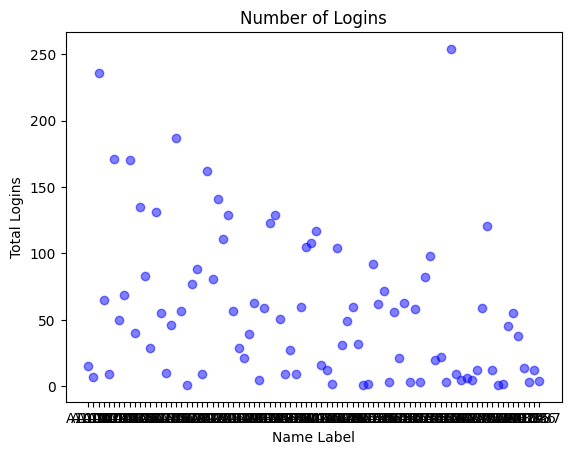

In [37]:
df = pd.read_csv("PIPLS_de-identification_Table.csv", encoding="utf-8")

total_login = []
name_label = ref['name_label'].tolist()

for i in range(len(name_label)):
    temp = 0
    for j in range(len(df)):
        if name_label[i] == df["Name"][j]:
            temp += 1
    total_login.append(temp)

# Creating DataFrame directly
scatter = pd.DataFrame({"name_label": name_label, "total_Login": total_login})

# Plotting
plt.scatter(scatter["name_label"], scatter["total_Login"], color="blue", alpha=0.5)
plt.title("Number of Logins")
plt.xlabel("Name Label")
plt.ylabel("Total Logins")
plt.show()


In [59]:
label_encoder = LabelEncoder()
name_id = label_encoder.fit_transform(scatter["name_label"])
k_temp = pd.DataFrame({"total_login":total_login, "name_id":name_id})

kmeans = KMeans(n_clusters = 5, random_state = 42)
scatter["k-mean_total_login"] = kmeans.fit_predict(k_temp)

plt.scatter(scatter["k-mean_total_login"], scatter["total_login"], c = scatter["k-mean_total_login"])
plt.xlabel("mame_label")
plt.ylabel("total_login")
plt.title("K-means Clustering of number of login")
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'total_login'